# Covid-19 (Coronavirus) Analytics and Forecasting

***
*WORK IN PROGRESS*
***

Note - All data was gathered and prepared on the [Covid19_Data_ETL.ipynb](https://github.com/BrianLeip/CoronaVirus/blob/master/Covid19_Data_ETL.ipynb) notebook prior to loading into this notebook, following standard best practices for data analytics.

## Data Sources

### Primary Data Source: Johns Hopkins CSSE Data Repository 
- Link: https://github.com/CSSEGISandData/COVID-19  
- **Live data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US County (cases, deaths)
- **Historic time series data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US Counties (cases, deaths)

### --PENDING-- US State Testing and Hospitalizations: Covid Tracking Project 
- Link: https://covidtracking.com/data/ 
- **Live data:**
    - US State testing and hopspitalization, ICU stats --PENDING--
- **Historic time series data:**
    - US State testing and hopspitalization, ICU stats --PENDING--

### --PENDING-- US County - Alternative: NY Times
- Link: https://github.com/nytimes/covid-19-data/
- **Historic time series data:**
    - US States (cases, deaths) --PENDING--
    - US Counties (cases, deaths) --PENDING--

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import os
import seaborn as sns
sns.set()

## Load the Data
See the Covid19_Data_ETL notebook for info on the data gathering and wrangling process.  
All original data left unchanged, only the format was changed to make it preferable to work with for EDA and Data Viz

### Dataset 1: John Hopkins

In [2]:
jh_live_global = pd.read_csv('Datasets/JH/jh_live_global_orig.csv')

In [3]:
jh_live_countries = pd.read_csv('Datasets/JH/jh_live_countries.csv', index_col=0)

In [4]:
jh_live_usstates = pd.read_csv('Datasets/JH/jh_live_usstates.csv', index_col=0)

In [5]:
jh_live_uscounties = pd.read_csv('Datasets/JH/jh_live_uscounties.csv', index_col=[0,1])

In [6]:
jh_hist_countries_cases = pd.read_csv('Datasets/JH/jh_hist_countries_cases.csv', index_col=0, parse_dates=True)

In [7]:
jh_hist_countries_deaths = pd.read_csv('Datasets/JH/jh_hist_countries_deaths.csv', index_col=0, parse_dates=True)

In [8]:
jh_hist_countries_recovered = pd.read_csv('Datasets/JH/jh_hist_countries_recovered.csv', index_col=0, parse_dates=True)

In [9]:
jh_hist_usstates_cases = pd.read_csv('Datasets/JH/jh_hist_usstates_cases.csv', index_col=0, parse_dates=True)

In [10]:
jh_hist_usstates_deaths = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths.csv', index_col=0, parse_dates=True)

In [11]:
jh_hist_uscounties_cases = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases.csv', index_col=0, header=[0,1], parse_dates=True)

In [12]:
jh_hist_uscounties_deaths = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths.csv', index_col=0, header=[0,1], parse_dates=True)

### Dataset 2: Covid Tracking Project

** PENDING **

### Dataset 3: New York Times (Alternative Historic US State & County data)

** PENDING **

## Prep Some Commonly Used Data (e.g. current date for each dataset)

In [13]:
jh_live_date = jh_live_global['Last_Update'][0]
jh_live_date = pd.to_datetime(jh_live_date)
jh_live_date = pd.Timestamp(jh_live_date.year, jh_live_date.month, jh_live_date.day)
jh_live_date

Timestamp('2020-04-08 00:00:00')

In [14]:
jh_hist_date = jh_hist_countries_cases.index[-1]
jh_hist_date

Timestamp('2020-04-08 00:00:00')

In [15]:
# Date to zoom in on for charting recent data
zoom_date = '3/15/2020'
zoom_date2 = '3/20/2020'
zoom_date3 = '3/25/2020'

## Exploratory Data Analysis (EDA)

### Global and Country Level

In [16]:
# Total Global confirmed cases, deaths, recovered, and active (live)
jh_live_countries[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

Confirmed    1511104
Deaths         88338
Recovered     328661
Active       1094105
dtype: int64

In [17]:
# Top countries by confirmed count as of latest date
top_countries = jh_live_countries.nlargest(25, 'Confirmed')
top_countries.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Country_Region,,,,,,,
US,429052,14695,23559,390798,2020-04-08 22:51:58,38.004821,-90.477624
Spain,148220,14792,48021,85407,2020-04-08 22:51:39,40.463667,-3.749220
Italy,139422,17669,26491,95262,2020-04-08 22:51:39,41.871940,12.567380
France,113959,10887,21452,81620,2020-04-08 22:51:39,8.314863,-21.695174
Germany,113296,2349,46300,64647,2020-04-08 22:51:39,51.165691,10.451526


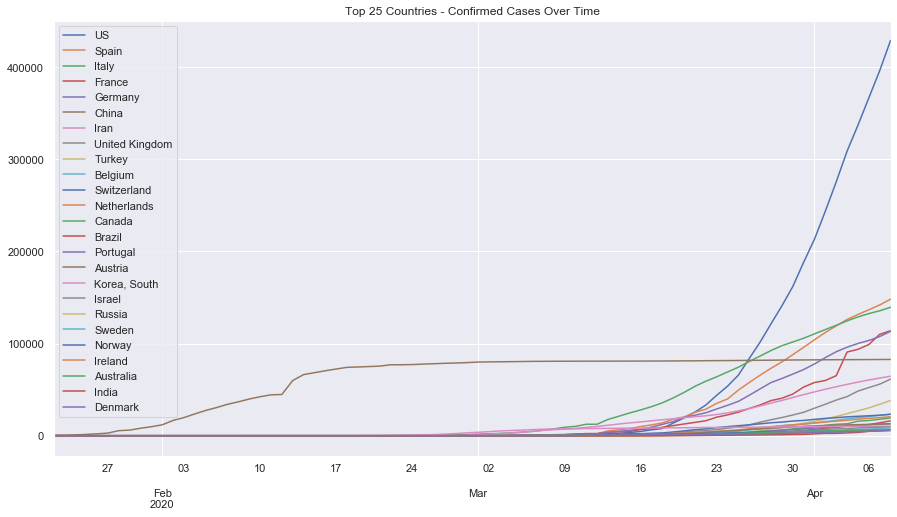

In [18]:
# Plot the top 25 countries confirmed infections over time
jh_hist_countries_cases[top_countries.index].plot(figsize=(15,8), title="Top 25 Countries - Confirmed Cases Over Time")

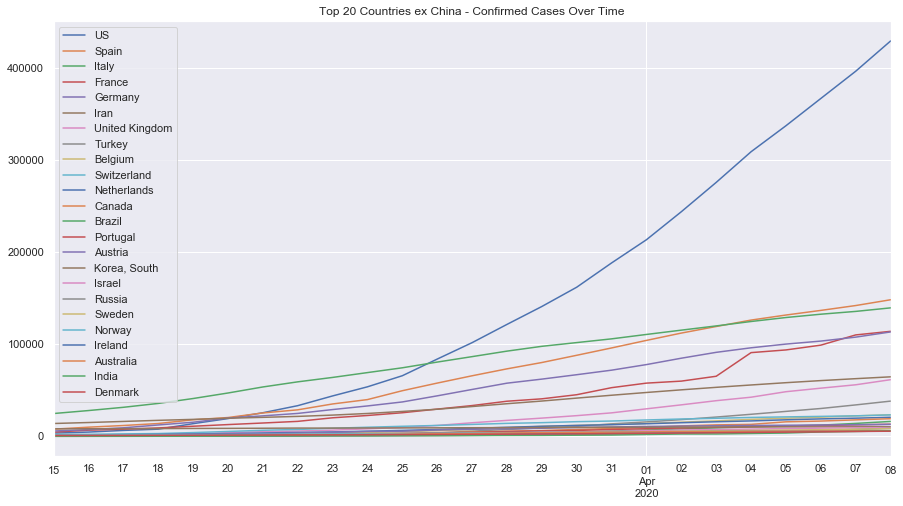

In [19]:
# Same chart but excluding China and starting on Mar 15 to zoom in
jh_hist_countries_cases[top_countries.index].loc[zoom_date:, top_countries.index != 'China'].plot(figsize=(15,8), title="Top 20 Countries ex China - Confirmed Cases Over Time")

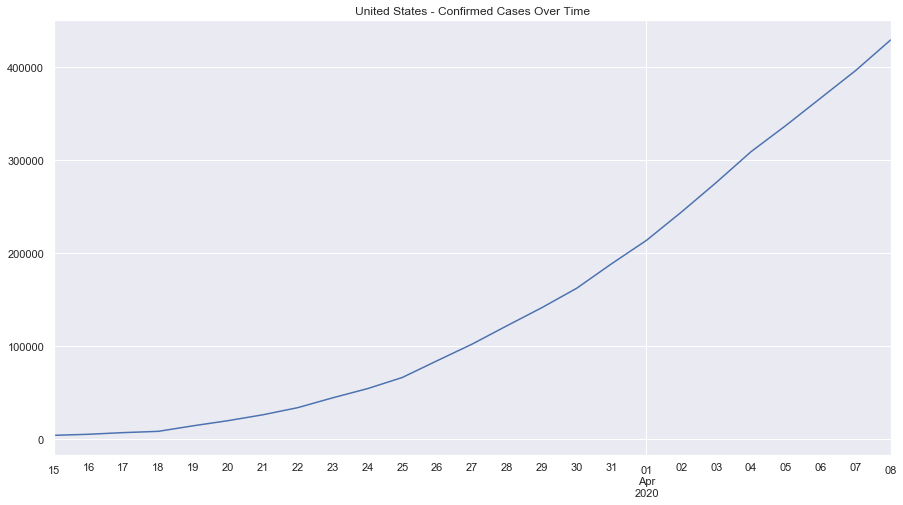

In [20]:
# Same chart but US only and starting on Mar 15 to zoom in
jh_hist_countries_cases.loc[zoom_date:, 'US'].plot(figsize=(15,8), title="United States - Confirmed Cases Over Time")

### US State Level

In [21]:
# Top US States by confirmed cases
top_states = jh_live_usstates.nlargest(20, 'Confirmed')
top_states.head(10)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Province_State,,,,,,,
New York,151061,6268,0,144793,2020-04-08 22:51:58,42.671593,-75.579694
New Jersey,47437,1504,0,45933,2020-04-08 22:51:58,40.286441,-74.622450
Michigan,20346,959,0,19387,2020-04-08 22:51:58,43.842877,-85.048191
California,18897,495,0,18402,2020-04-08 22:51:58,37.639262,-120.705629
Louisiana,17030,652,0,16378,2020-04-08 22:51:58,31.077901,-91.832044
Massachusetts,16790,433,0,16357,2020-04-08 22:51:58,42.176400,-71.577050
Pennsylvania,16631,318,0,16313,2020-04-08 22:51:58,40.818078,-77.615318
Florida,15456,309,0,15147,2020-04-08 22:51:58,28.904740,-82.659773
Illinois,15078,462,0,14616,2020-04-08 22:51:58,40.093131,-89.111005


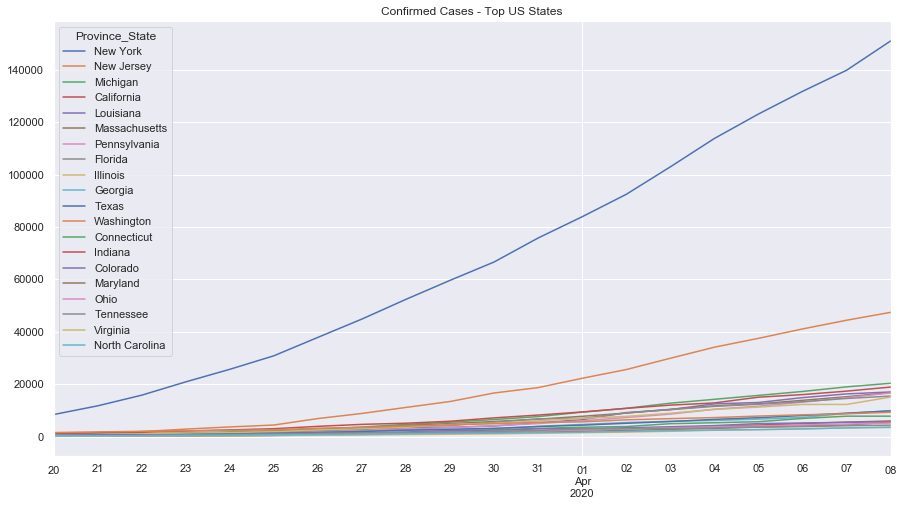

In [22]:
# Chart the top states with confirmed positive
jh_hist_usstates_cases.loc[zoom_date2:, top_states.index].plot(title='Confirmed Cases - Top US States', figsize=(15,8))

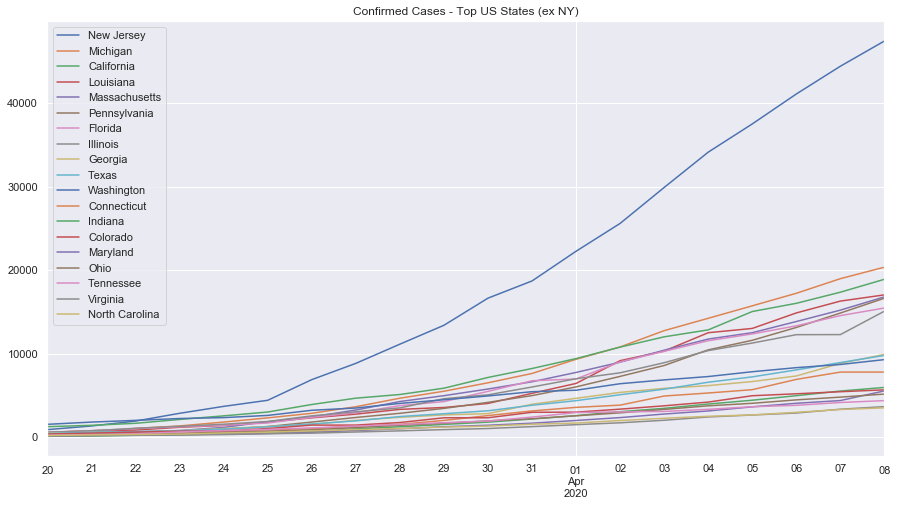

In [23]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_cases[top_states.index].loc[zoom_date2:, top_states.index != 'New York'].plot(title='Confirmed Cases - Top US States (ex NY)', figsize=(15,8))

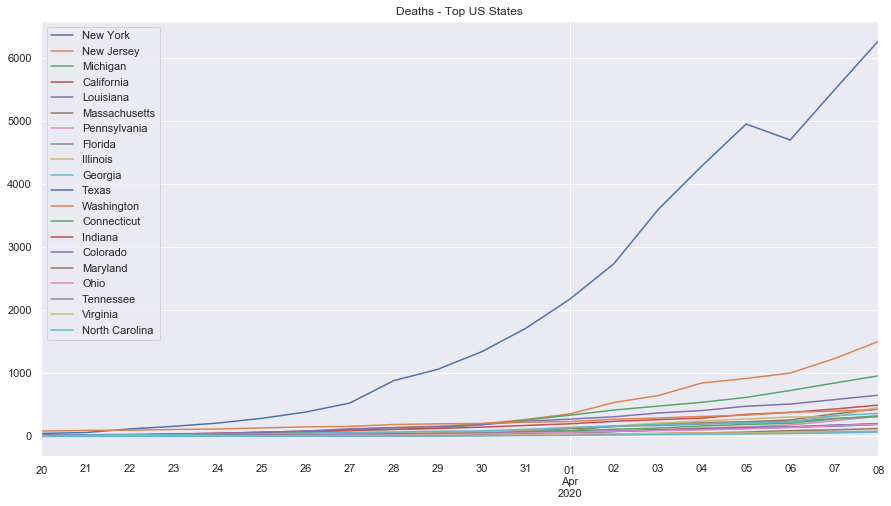

In [24]:
# Chart the top states of by # of deaths
jh_hist_usstates_deaths[top_states.index].loc[zoom_date2:, :].plot(title='Deaths - Top US States', figsize=(15,8))

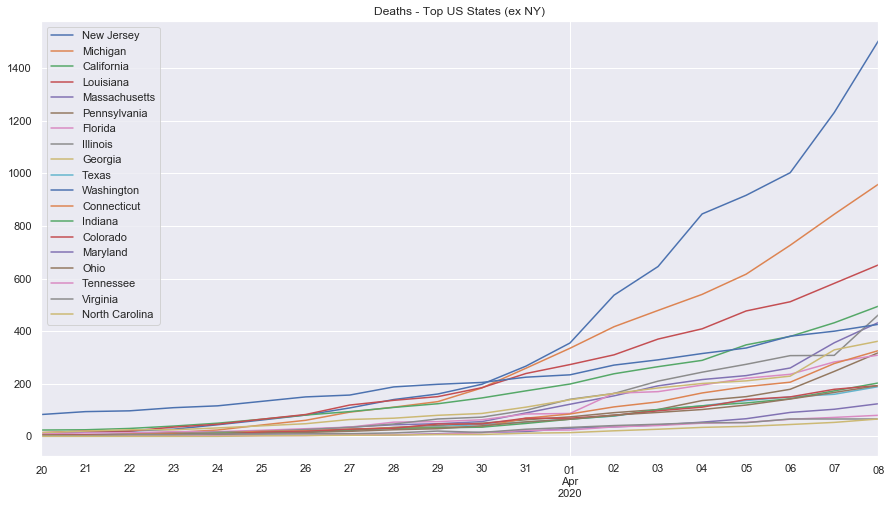

In [25]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_deaths[top_states.index].loc[zoom_date2:, top_states.index != 'New York'].plot(title='Deaths - Top US States (ex NY)', figsize=(15,8))


### US County Level

In [26]:
top_counties_NY = jh_live_uscounties.loc['New York'].nlargest(10, 'Confirmed')
top_counties_NY.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
New York City,81803,4571,0,77232,2020-04-08 22:51:58,40.767273,-73.971526,36061.0
Nassau,18548,500,0,18048,2020-04-08 22:51:58,40.740665,-73.589419,36059.0
Suffolk,17008,323,0,16685,2020-04-08 22:51:58,40.883201,-72.801217,36103.0
Westchester,15887,283,0,15604,2020-04-08 22:51:58,41.162784,-73.757417,36119.0
Rockland,6413,154,0,6259,2020-04-08 22:51:58,41.150279,-74.025605,36087.0


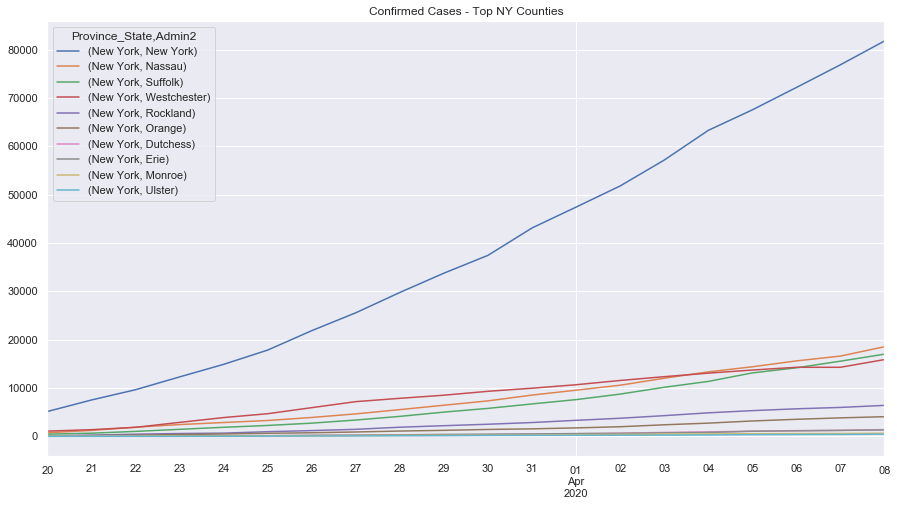

In [27]:
# Chart the NY Counties confirmed cases over time
top_counties_NY_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('New York')].nlargest(10).index
top_counties_NY_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('New York', top_counties_NY_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_NY_cases.plot(title='Confirmed Cases - Top NY Counties', figsize=(15,8))

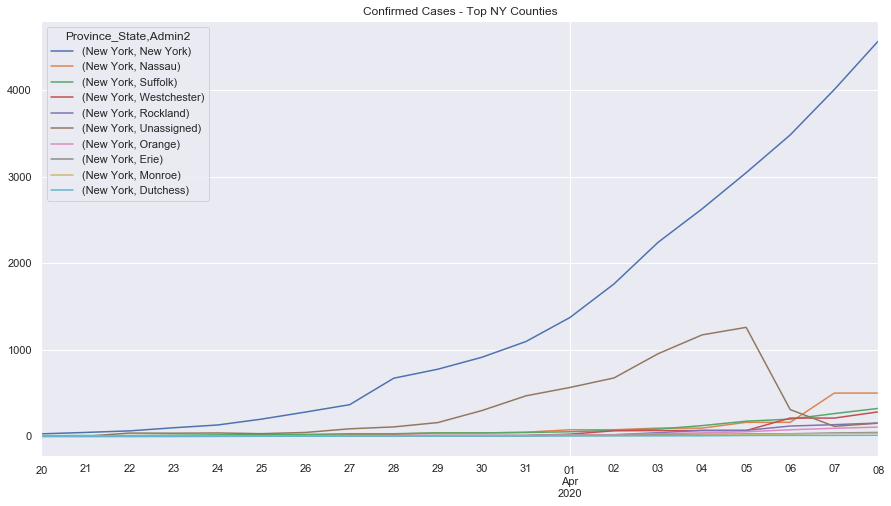

In [28]:
# Chart the NY Counties deaths over time
top_counties_NY_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('New York')].nlargest(10).index
top_counties_NY_deaths = jh_hist_uscounties_deaths.loc[zoom_date2:, ('New York', top_counties_NY_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_NY_deaths.plot(title='Confirmed Cases - Top NY Counties', figsize=(15,8))

In [29]:
top_counties_MA = jh_live_uscounties.loc['Massachusetts'].nlargest(10, 'Confirmed')
top_counties_MA.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Suffolk,3600,48,0,3552,2020-04-08 22:51:58,42.327951,-71.078504,25025.0
Middlesex,3545,80,0,3465,2020-04-08 22:51:58,42.486077,-71.390492,25017.0
Essex,2103,50,0,2053,2020-04-08 22:51:58,42.668763,-70.946872,25009.0
Norfolk,1778,41,0,1737,2020-04-08 22:51:58,42.160731,-71.205304,25021.0
Plymouth,1327,33,0,1294,2020-04-08 22:51:58,41.940706,-70.808028,25023.0


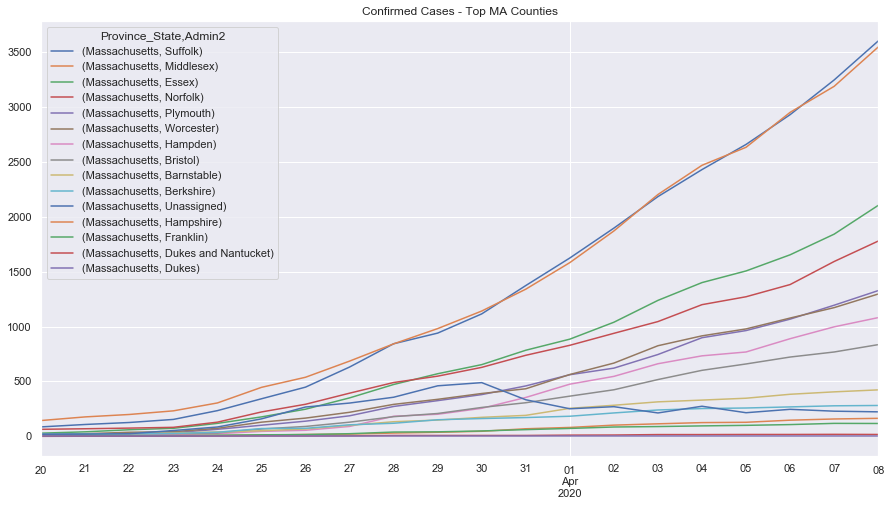

In [30]:
# Chart the MA Counties confirmed cases over time
top_counties_MA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('Massachusetts')].nlargest(15).index
top_counties_MA_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_cases.plot(title='Confirmed Cases - Top MA Counties', figsize=(15,8))

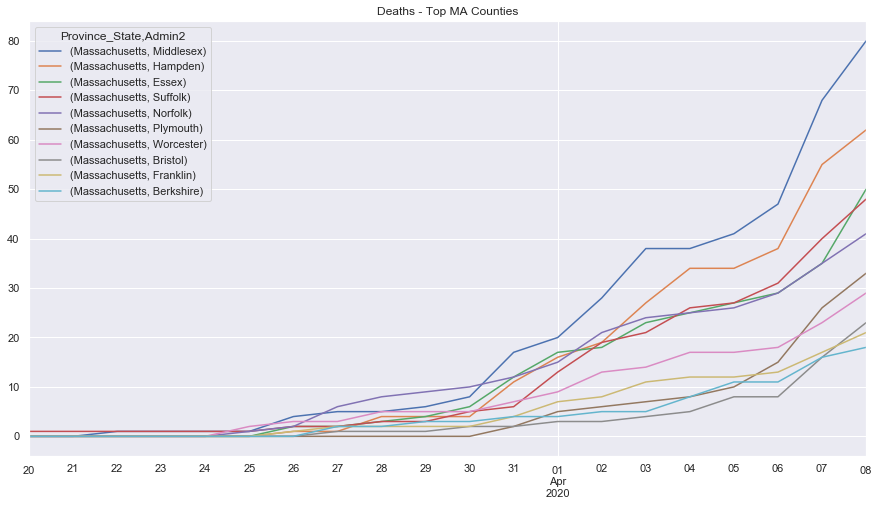

In [31]:
# Chart the MA County deaths over time
top_counties_MA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('Massachusetts')].nlargest(10).index
top_counties_MA_deaths = jh_hist_uscounties_deaths.loc[zoom_date2:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_deaths.plot(title='Deaths - Top MA Counties', figsize=(15,8))

In [32]:
top_counties_CA = jh_live_uscounties.loc['California'].nlargest(15, 'Confirmed')
top_counties_CA.head(7)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Los Angeles,7559,198,0,7361,2020-04-08 22:51:58,34.308284,-118.228241,6037.0
San Diego,1454,31,0,1423,2020-04-08 22:51:58,33.034846,-116.736533,6073.0
Santa Clara,1380,46,0,1334,2020-04-08 22:51:58,37.231049,-121.697046,6085.0
Riverside,1179,32,0,1147,2020-04-08 22:51:58,33.743150,-115.993358,6065.0
Orange,1016,17,0,999,2020-04-08 22:51:58,33.701475,-117.764600,6059.0
San Francisco,676,10,0,666,2020-04-08 22:51:58,37.752151,-122.438567,6075.0
Alameda,674,16,0,658,2020-04-08 22:51:58,37.646294,-121.892927,6001.0


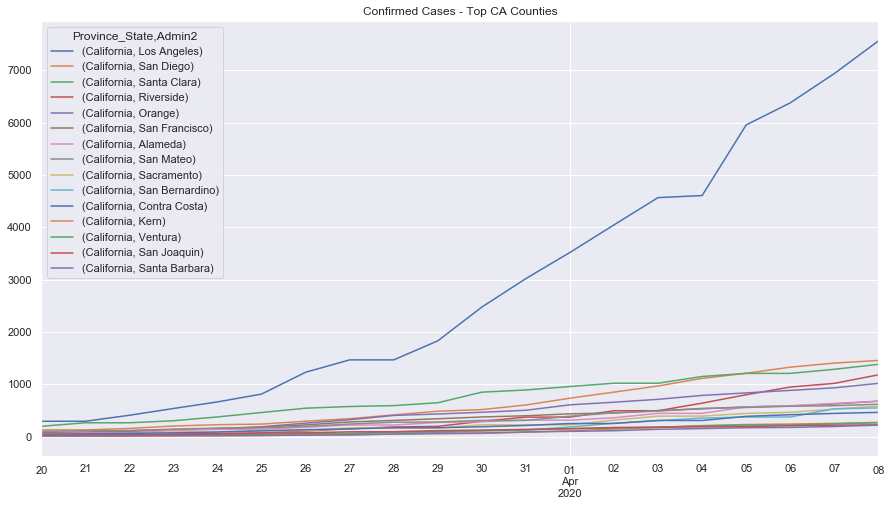

In [33]:
# Chart the CA Counties confirmed cases over time
top_counties_CA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('California')].nlargest(15).index
top_counties_CA_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_cases.plot(title='Confirmed Cases - Top CA Counties', figsize=(15,8))

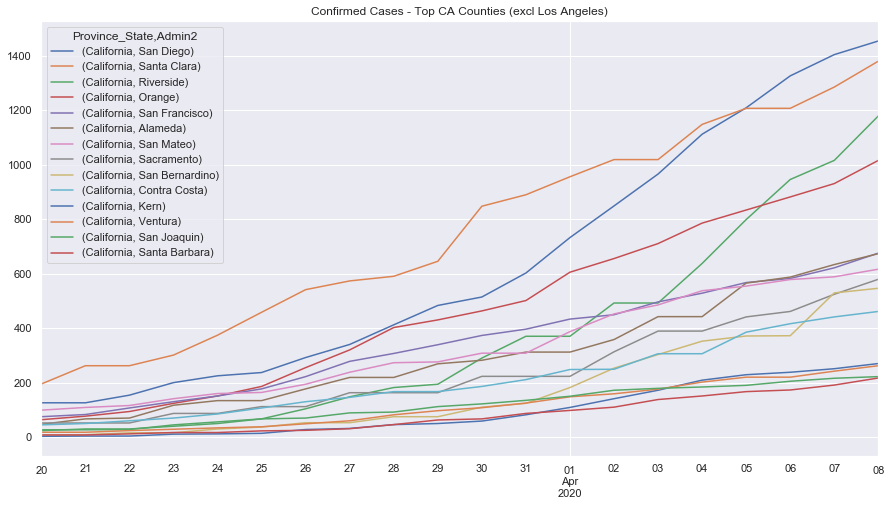

In [34]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_cases = top_counties_CA_cases.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_cases.plot(title='Confirmed Cases - Top CA Counties (excl Los Angeles)', figsize=(15,8))

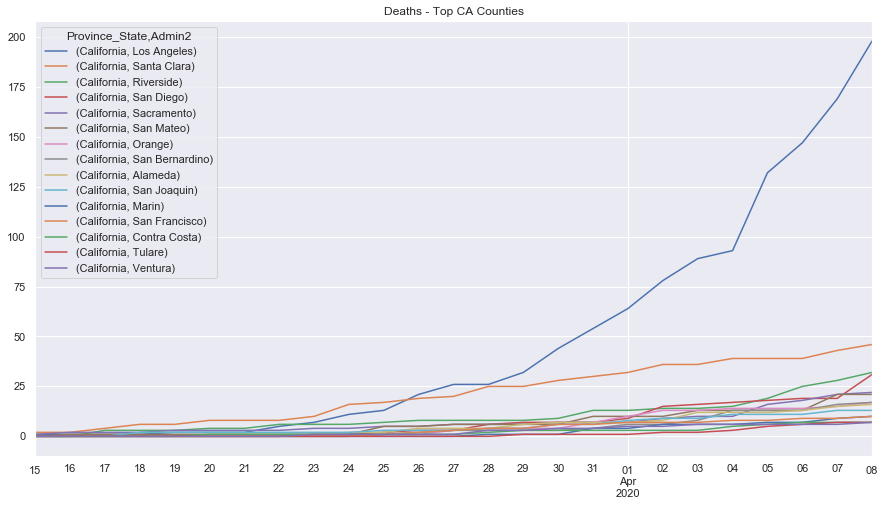

In [35]:
# Chart the CA Counties deaths over time
top_counties_CA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('California')].nlargest(15).index
top_counties_CA_deaths = jh_hist_uscounties_deaths.loc[zoom_date:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_deaths.plot(title='Deaths - Top CA Counties', figsize=(15,8))

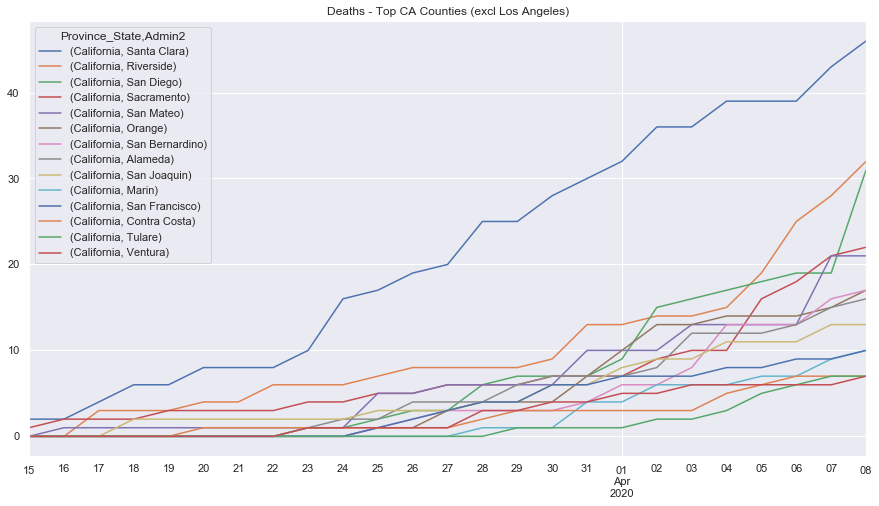

In [36]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_deaths = top_counties_CA_deaths.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_deaths.plot(title='Deaths - Top CA Counties (excl Los Angeles)', figsize=(15,8))

### US Counties - Friends & Family

In [37]:
fnf_counties = [('California', 'Orange'), ('Massachusetts', 'Middlesex'), ('Massachusetts', 'Suffolk'), 
                ('Massachusetts', 'Essex'), ('Massachusetts', 'Bristol')]

#### Live stats for locations where friends and family live

In [38]:
# Add live stats from US Counties of friends & family
fnf_live = jh_live_uscounties.loc[fnf_counties, :]
fnf_live = fnf_live.drop('FIPS', axis=1)

In [39]:
# Add live stats from Costa Rica from the Countries dataset
fnf_cr = jh_live_countries.loc[['Costa Rica']]

In [40]:
# Merge Costa Rica data with US County data
fnf_live.loc[('Costa Rica')] = fnf_cr.loc[('Costa Rica')]

In [41]:
# Show all live data
fnf_live

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
"(California, Orange)",1016,17,0,999,2020-04-08 22:51:58,33.701475,-117.764600
"(Massachusetts, Middlesex)",3545,80,0,3465,2020-04-08 22:51:58,42.486077,-71.390492
"(Massachusetts, Suffolk)",3600,48,0,3552,2020-04-08 22:51:58,42.327951,-71.078504
"(Massachusetts, Essex)",2103,50,0,2053,2020-04-08 22:51:58,42.668763,-70.946872
"(Massachusetts, Bristol)",835,23,0,812,2020-04-08 22:51:58,41.792284,-71.108722
Costa Rica,502,3,29,470,2020-04-08 22:51:39,9.748900,-83.753400


#### Confirmed cases over time in locations where friends and family live

In [42]:
# Add confirmed cases from US Counties of friends & family
fnf_hist_cases = jh_hist_uscounties_cases.loc[:, fnf_counties ]

In [43]:
# Add confirmed cases in Costa Rica from the Countries dataset
fnf_hist_cases[('Costa Rica', '')] = jh_hist_countries_cases['Costa Rica']

In [44]:
# Check the most recent 5 days
fnf_hist_cases.tail()

Province_State California Massachusetts                       Costa Rica
Admin2             Orange     Middlesex Suffolk Essex Bristol           
2020-04-04            786          2468    2429  1400     601        435
2020-04-05            834          2632    2658  1506     659        454
2020-04-06            882          2950    2929  1653     722        467
2020-04-07            931          3187    3245  1841     768        483
2020-04-08           1016          3545    3600  2103     835        502

In [45]:
# Sort in descending order
fnf_hist_cases.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

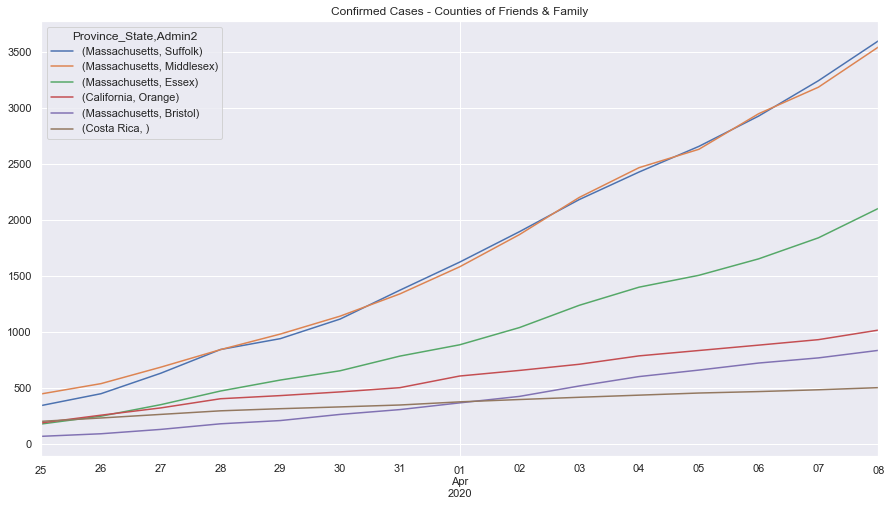

In [46]:
# Plot the data in a chart
fnf_hist_cases.loc[zoom_date3:,:].plot(title='Confirmed Cases - Counties of Friends & Family', figsize=(15,8))

#### Deaths over time in locations where friends and family live

In [47]:
# Add deaths from US Counties of friends & family
fnf_hist_deaths = jh_hist_uscounties_deaths.loc[:, fnf_counties ]

In [48]:
# Add deaths in Costa Rica from the Countries dataset
fnf_hist_deaths[('Costa Rica', '')] = jh_hist_countries_deaths['Costa Rica']

In [49]:
# Check the most recent 5 days
fnf_hist_deaths.tail()

Province_State California Massachusetts                       Costa Rica
Admin2             Orange     Middlesex Suffolk Essex Bristol           
2020-04-04             14            38      26    25       5          2
2020-04-05             14            41      27    27       8          2
2020-04-06             14            47      31    29       8          2
2020-04-07             15            68      40    35      16          2
2020-04-08             17            80      48    50      23          3

In [50]:
# Sort in descending order
fnf_hist_deaths.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

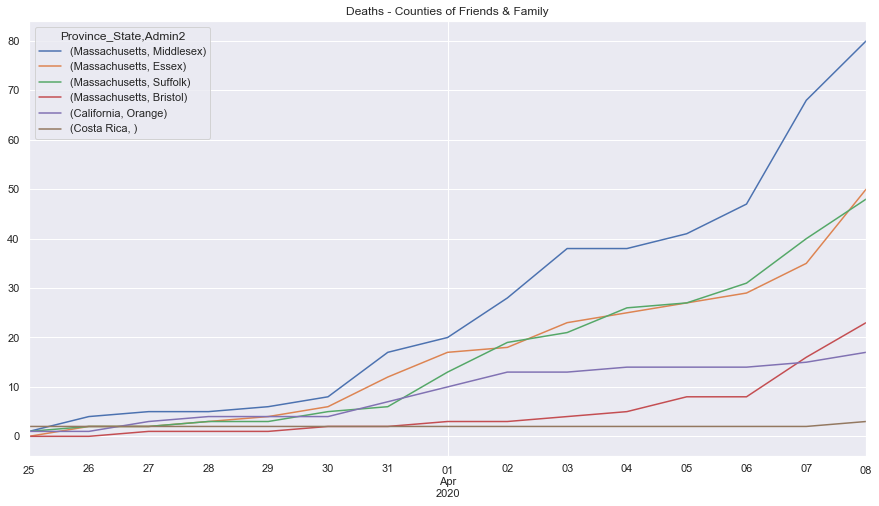

In [51]:
# Plot the data in a chart
fnf_hist_deaths.loc[zoom_date3:,:].plot(title='Deaths - Counties of Friends & Family', figsize=(15,8))

**TODO NEXT:**  
- Finish ETL data wrangling and exporting with CTP and NYT data
- Get population data for each country / state and add to this report (may be easiest to just put in a csv file)
  - Also population density if possible
  - Add metrics based on poulation data (% of population infected, etc)
- Create new datasets that align start as of xx cases
    - 100+ confirmed cases
    - 10+ deaths
- Consider adding other datasets (Google location tracking?)
- More EDA and Data Viz
- Perform forecasting using the historic time series data
- Model out different scenarios: 
  - No changes
  - Lockdown
  - Extensive testing
  - Mandatory quarantines
  - Containment effectiveness score for each country (estimated)
  - Cure discovered
- Look into using Unity to model out scenarios, using simulated humans and the Global / US map tool I have